# GWAS: the Influence of genetics on cholesterol level

## 1. Setting the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data preprocessing

### Open the files and have a look at them.

In [2]:
genotypes = pd.read_csv('data/genotypes.vcf', sep = '\t', skiprows = 3) #loading the dataframes
covariates = pd.read_csv('data/covariates.txt', sep = ',')
phenotypes = pd.read_csv('data/phenotypes.txt', sep = ',')

In [3]:
display(genotypes, covariates, phenotypes)

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,M11051101,...,M11073015,M11060903,M11082010,M11073003,M11082001,M11072309,M11081711,M11060203,M11071302,M11081306
0,1,813034,rs59771807,.,A,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1
1,1,911418,rs113068688,.,A,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1
2,1,981376,rs199593375,.,C,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1
3,1,1119361,rs143930968,.,A,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1
4,1,1178854,rs202178204,.,T,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,22,50830044,rs7510868,A,G,.,PASS,.,GT,1/1,...,1/1,0/1,0/1,0/1,1/1,0/1,0/1,0/1,1/1,1/1
24996,22,50898827,rs202156491,.,G,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1
24997,22,50943510,rs58516993,.,G,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1
24998,22,50944601,rs200851611,.,C,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1


,sample_id,gender
0,M11051101,2
1,M11050404,2
2,M11051105,1
3,M11051901,2
4,M11052507,2
...,...,...
314,M11072309,2
315,M11081711,1
316,M11060203,1
317,M11071302,1


,sample_id,Cholesterol
0,M11051101,21.035961
1,M11050404,20.967776
2,M11051105,21.227905
3,M11051901,21.381547
4,M11052507,20.688926
...,...,...
314,M11072309,20.871122
315,M11081711,21.453844
316,M11060203,20.897561
317,M11071302,20.952394


### 2. SNP-level filtering: call rate.

In [4]:
genotypes_individuals = genotypes.iloc[:, 9:].replace('.', np.nan)

In [5]:
genotypes['call_rate'] = 100 * (genotypes_individuals.count(axis = 1)/319) #calculating call rates
genotypes

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,M11051101,...,M11060903,M11082010,M11073003,M11082001,M11072309,M11081711,M11060203,M11071302,M11081306,call_rate
0,1,813034,rs59771807,.,A,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.000000
1,1,911418,rs113068688,.,A,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.000000
2,1,981376,rs199593375,.,C,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.000000
3,1,1119361,rs143930968,.,A,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.000000
4,1,1178854,rs202178204,.,T,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,22,50830044,rs7510868,A,G,.,PASS,.,GT,1/1,...,0/1,0/1,0/1,1/1,0/1,0/1,0/1,1/1,1/1,98.746082
24996,22,50898827,rs202156491,.,G,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.000000
24997,22,50943510,rs58516993,.,G,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.000000
24998,22,50944601,rs200851611,.,C,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.000000


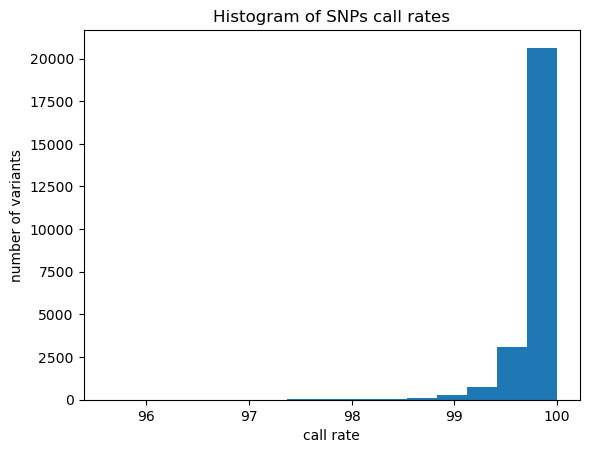

In [6]:
plt.hist(genotypes['call_rate'], bins = 15)
plt.title('Histogram of SNPs call rates')
plt.xlabel('call rate')
plt.ylabel('number of variants')
plt.show()

>This is our distribution of call rates per variant as a histogram. We can see most of them are close to 100%


In [7]:
filt_geno = genotypes.drop(index = genotypes[genotypes["call_rate"] != 100].index).reset_index(
    drop = True) #dropping the call rates inferior to 100%

In [8]:
print(f"removed variants = {len(genotypes) - len(filt_geno)}")

removed variants = 4365


>The initial number of variants is 25 000. if we decide to keep variants whose call rates are equal to 100%, we need to remove 4365 variants.

### 3. SNP-level filtering: minor allele frequency (MAF).

In [9]:
mafs = []
for i in range(len(filt_geno)): #calculating the maf for every variant
    row = filt_geno.loc[i,:]
    maf = 0
    for j in range(9, len(filt_geno.iloc[0, :]) - 1):
        snp_info = row.iloc[j]
        if snp_info == "0/0":
            maf += 0
        if snp_info == "0/1" or snp_info == "1/0":
            maf += 1
        if snp_info == "1/1":
            maf += 2
    mafs.append(maf/(2*319))

In [13]:
filt_geno['maf'] = 100 * (1 - pd.Series(mafs))
filt_geno.sample(5)

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,M11051101,...,M11082010,M11073003,M11082001,M11072309,M11081711,M11060203,M11071302,M11081306,call_rate,maf
12728,10,117741578,rs180696,C,T,.,PASS,.,GT,0/1,...,0/1,0/1,0/1,0/1,0/1,0/1,1/1,0/1,100.0,41.692790
1087,1,167502159,rs12564899,G,A,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.0,17.241379
6670,5,67682512,rs7725083,T,C,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.0,25.391850
3248,2,217426578,rs182363415,.,G,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.0,0.313480
12220,10,46967544,rs202105571,.,G,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.0,0.000000


In [14]:
#maf < 1% filtered data
df = filt_geno.query('maf > 1 & maf <= 99')
#since we cant assume which is predominant allele in our dataset we filter at 1% and 99% interval 
#(in our dataset this doesn't change the results)

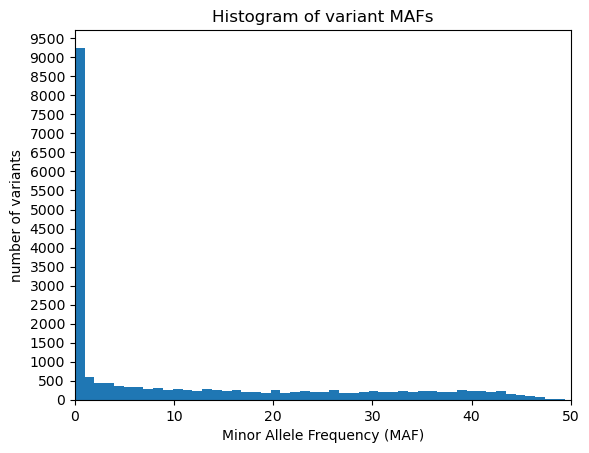

In [15]:
plt.hist(filt_geno['maf'], bins=50)
plt.xlim(0, 50)
plt.yticks(np.arange(0, 10000, 500))
plt.xlabel('Minor Allele Frequency (MAF)')
plt.ylabel('number of variants') 
plt.title('Histogram of variant MAFs')
plt.show()

> Histogram of the MAF of our variants.

In [16]:
print(f'removed variants from maf = {len(filt_geno) - len(df)}')

removed variants from maf = 9253


> After calculating the Minor Allele Frequence (MAF) for each variant, we have removed variants with a MAF inferior or equal to 1%.
9253 variants were removed.

## 3. Genome-Wide Association Studies

### 1. Start your exploration by using statistical methods to look at the potential effect of gender on the phenotype.

In [17]:
ds = pd.DataFrame([covariates.iloc[:,1],phenotypes.iloc[:,1]]).T
ds.head(3)

,gender,Cholesterol
0,2.0,21.035961
1,2.0,20.967776
2,1.0,21.227905


In [18]:
ds['gender'] = ds['gender'].replace(1, 'male').replace(2, 'female')
ds.head(3)

,gender,Cholesterol
0,female,21.035961
1,female,20.967776
2,male,21.227905


> Tables of cholesterol level by gender.

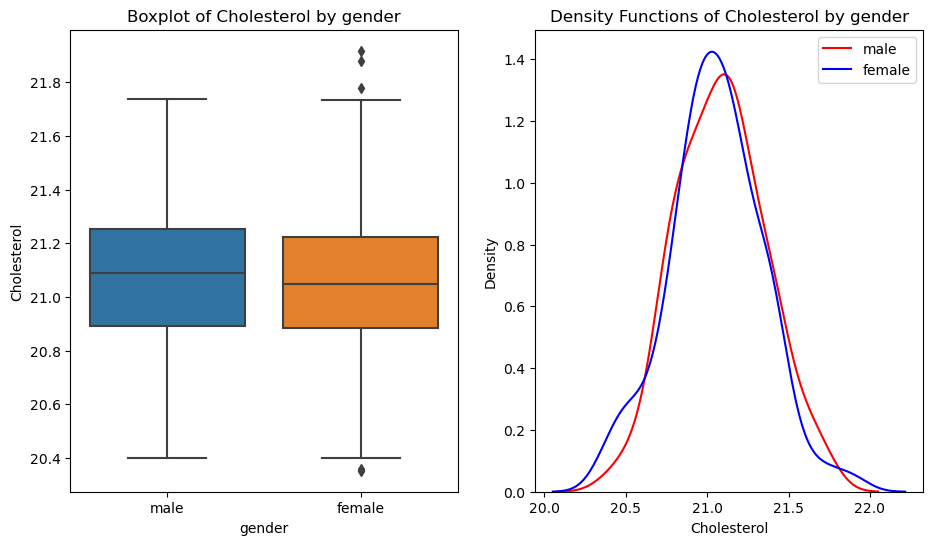

In [19]:
male = ds[ds['gender'] == 'male']
female = ds[ds['gender'] == 'female']

fig, axs = plt.subplots(ncols = 2, figsize = (11, 6))
sns.boxplot(x = ds['gender'], y = ds['Cholesterol'], ax = axs[0], order = ['male', 'female'])
sns.kdeplot(male['Cholesterol'], color = 'r', legend = True, ax = axs[1], label = 'male')
sns.kdeplot(female['Cholesterol'], color = 'b', legend = True, ax = axs[1], label = 'female')
axs[0].set_title('Boxplot of Cholesterol by gender')
axs[1].set_title('Density Functions of Cholesterol by gender') 
plt.legend()
plt.show()

> Boxplot and density plot showing the distribution of cholesterol level by gender.

> We can see that the boxplots as well as the density plots of our cholesterol distributions are extremely similar. From these observations, we can assume gender does not have a major impact on the cholesterol phenotype and can exclude gender from our future calculations as it is an uninfluencial covariate.



In [20]:
#Another way we could verify this, is by conducting an independant student's t-test 
#on the 2 distributions of cholesterol by gender
from scipy.stats import ttest_ind
stat, p = ttest_ind(male['Cholesterol'], female['Cholesterol'])
print("p value = ", p)

p value =  0.33499144876124276


> As we can see with a p value > 0.05 (the standard significance level), we cannot reject the null hypothesis that these distribution are the same.

In [21]:
import statsmodels.formula.api as smf
ds['gender_ind'] = pd.get_dummies(ds['gender'], drop_first = True)
mod = smf.ols(formula = 'Cholesterol ~ C(gender_ind)', data = ds)

In [22]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9323
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.335
Time:                        15:30:50   Log-Likelihood:                -47.541
No. Observations:                 319   AIC:                             99.08
Df Residuals:                     317   BIC:                             106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             21.0540      0

> We have a practically null $R^2$ coefficient of determination which means we basically have no variance is explained by our model, our linear regression of Cholesterol based on gender. In layman's terms we can say that gender doesn't impact our Cholesterol phenotype (on this subset individuals).
So we don't have to include gender as a covariate in our future analysis.

### 2. Population structure

In [23]:
df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,M11051101,...,M11082010,M11073003,M11082001,M11072309,M11081711,M11060203,M11071302,M11081306,call_rate,maf
9,1,1846582,rs2748987,A,G,.,PASS,.,GT,0/1,...,0/1,1/1,1/1,1/1,0/1,0/1,0/1,1/1,100.0,18.338558
10,1,1963175,rs13302932,G,A,.,PASS,.,GT,0/1,...,0/1,1/1,1/1,1/1,1/1,0/1,0/1,0/1,100.0,34.012539
12,1,2164935,rs263531,G,T,.,PASS,.,GT,1/1,...,0/1,1/1,0/1,1/1,0/1,1/1,1/1,0/1,100.0,22.727273
14,1,2570897,rs78510883,.,G,.,PASS,.,GT,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,100.0,1.410658
20,1,3765678,rs4648423,T,C,.,PASS,.,GT,1/1,...,0/1,1/1,0/1,0/1,0/1,1/1,0/1,0/1,100.0,42.319749


In [24]:
numerical_zygous = {"0/0" : 0, "1/1" : 2, "0/1" : 1, "1/0" : 1} #transforming our dataframe into numerical values
#for PCA manipulation
df_for_pca = df.iloc[:, 9:-2].applymap(lambda x : numerical_zygous[x]).reset_index(drop = True).T

In [25]:
df_for_pca.columns = df.ID.values
df_for_pca

,rs2748987,rs13302932,rs263531,rs78510883,rs4648423,rs12756705,rs12021796,rs598564,rs349411,rs350197,...,rs2688101,rs6009547,rs17000964,rs7286670,rs139816,rs6009870,rs5771359,rs2272853,rs73439320,rs145373249
M11051101,1,1,2,2,2,2,1,1,0,2,...,2,1,1,1,0,1,2,2,2,2
M11050404,2,2,1,2,0,2,2,0,0,2,...,2,2,2,2,2,0,2,1,2,2
M11051105,2,2,2,2,2,1,0,2,2,2,...,0,2,1,2,1,1,1,2,2,2
M11051901,2,0,1,2,0,1,2,2,1,2,...,1,2,2,1,2,1,1,2,2,2
M11052507,2,1,2,2,1,2,2,2,2,1,...,2,0,2,1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M11072309,2,2,2,2,1,1,1,2,2,2,...,2,2,1,2,2,2,1,2,2,1
M11081711,1,2,1,2,1,2,2,2,2,2,...,2,2,2,2,2,0,2,0,2,2
M11060203,1,1,2,2,2,2,1,2,2,2,...,2,2,1,2,2,1,2,2,2,2
M11071302,1,1,2,2,1,2,2,2,1,2,...,2,2,1,2,2,1,1,1,2,2


In [26]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_df_for_pca = preprocessing.scale(df_for_pca)
#standardizing data is a standard PCA practise, even though here we have the same units for every variant
pca = PCA(n_components = 2)
pca.fit(scaled_df_for_pca)
pca_data = pca.transform(scaled_df_for_pca)

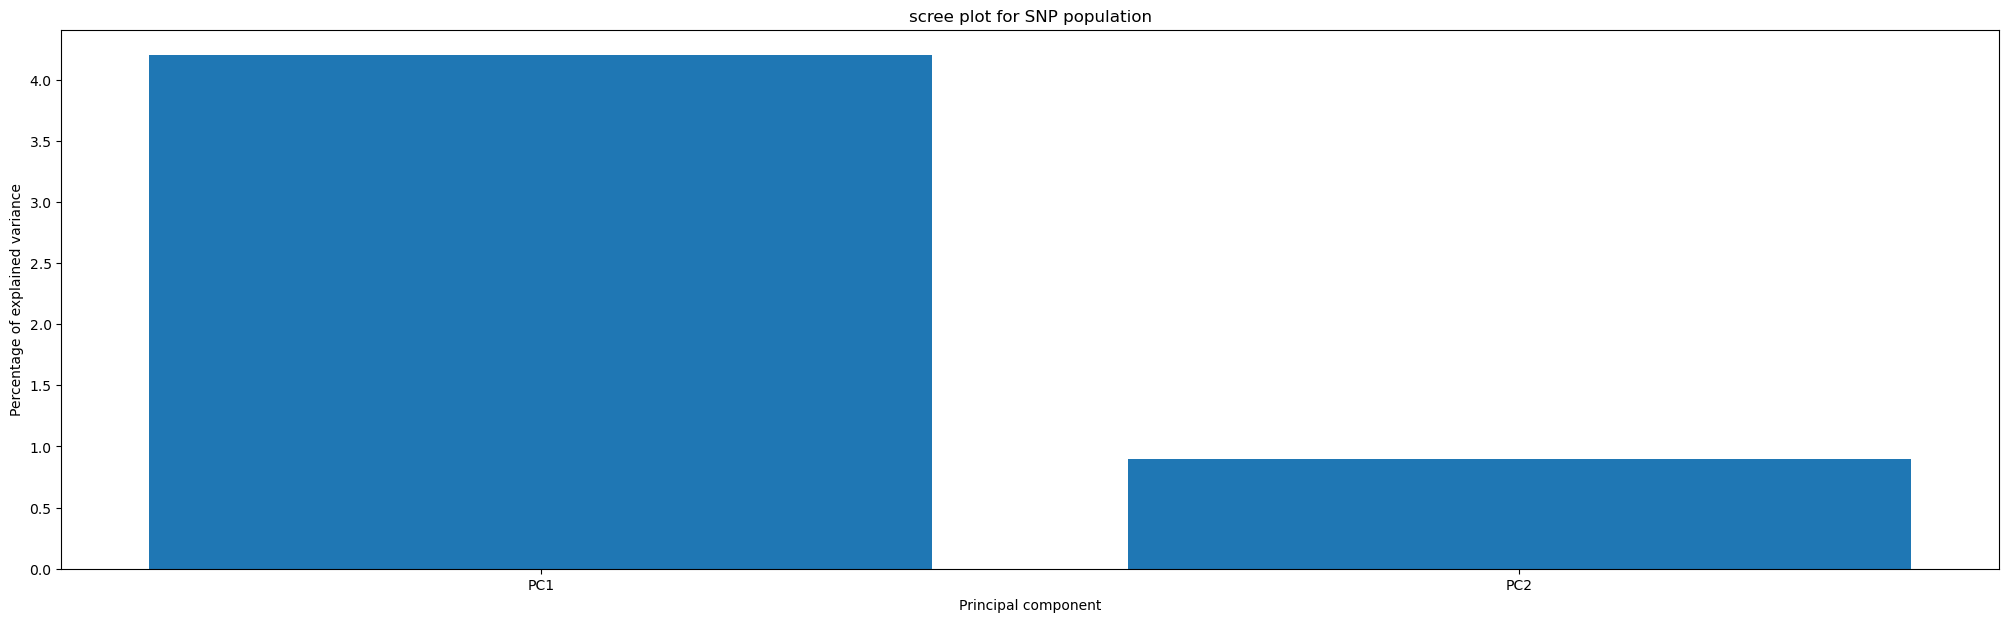

total var PC1 + PC2 =  5.1000000000000005


In [76]:
#scree plot
component_variance = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
plotlabels = ["PC" + str(j) for j in range(1, len(component_variance) + 1)] #10 first components
plt.figure(figsize = (25, 7))
plt.bar(x = range(1, len(component_variance) + 1), height = component_variance, tick_label = plotlabels)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal component")
plt.title("scree plot for SNP population")
plt.show()
print("total var PC1 + PC2 = ", sum(component_variance))

In [28]:
loading_scores = [pd.Series(pca.components_[i], index = 
                            df_for_pca.columns) for i in range(len(pca.components_))]

sorted_loading_scores = [loading_scores[i].abs().
                         sort_values(ascending = False) for i in range(len(pca.components_))]

for j in range(2): print("\nPC" + str(j + 1)+  " loading scores\n\n", sorted_loading_scores[j])


PC1 loading scores

 rs3865182     3.163942e-02
rs2043441     3.019748e-02
rs11250139    2.929962e-02
rs834787      2.894925e-02
rs62586001    2.866372e-02
                  ...     
rs8007621     3.739847e-06
rs35065331    3.585943e-06
rs10485060    2.334669e-06
rs1337811     2.329432e-06
rs4391464     4.546537e-07
Length: 11382, dtype: float64

PC2 loading scores

 rs671         4.380699e-02
rs1362075     3.949634e-02
rs12523848    3.755658e-02
rs9268830     3.719523e-02
rs12596275    3.664957e-02
                  ...     
rs73801078    1.809957e-06
rs13282034    1.721194e-06
rs7670092     1.090860e-06
rs2941431     5.541814e-07
rs9478696     3.231282e-07
Length: 11382, dtype: float64


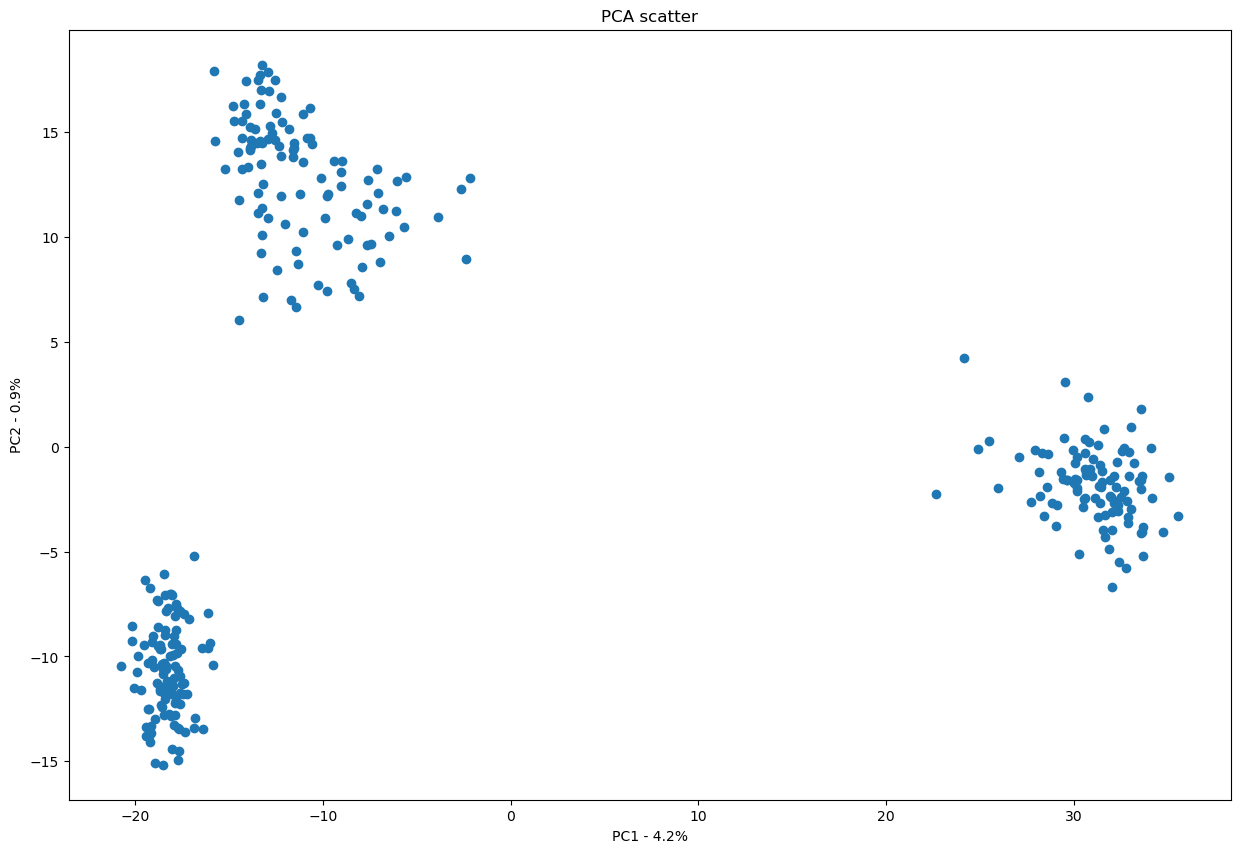

In [29]:
pca_df = pd.DataFrame(pca_data, columns = plotlabels)
plt.figure(figsize = (15, 10))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA scatter")
plt.xlabel("PC1 - {0}%".format(component_variance[0]))
plt.ylabel("PC2 - {0}%".format(component_variance[1]))
plt.show()

 > We can see we have 3 different clusters on our PCA plot above. These clusters represent 3 different types of individuals. This is because we have run our component analysis on the SNP variants and therefore have maximised the variance of our SNPs in to the first 2 principal components, this then clusters individuals with a similar composition of variants (on the PC1 & PC2 axis).
Therefore each individual of the same cluster has a common pattern of SNPs variants. This can be explained by the fact that they share a common ancestor, common geography or a family relationship. (or another linking reason)

> The totale variance explained by the first two components, PC1 and PC2 is around 5% of the total variance of our SNP dataset. If we had to do a linear regression afterwards it would be preferable to take into account some other PCs as covariants to improve our model. This would take out the association signals as these differents clusters could have different phenotypes, for example one of the groups could be more sensitive to cholesterol (phenotype of interest). By doing this we would be correcting the population structure, which is necessary in the observed population (composed of clusters).


### 3. Run a GWAS without correcting for covariates.

In [30]:
#Using the df_for_pca with numerical values
df_gwas = df_for_pca.copy().reset_index().rename(columns={'index': 'id'})
df_gwas['Cholesterol'] = phenotypes['Cholesterol']
fixed_columns = pd.Series(df_gwas.columns.values.tolist()).apply(lambda x : '_'.join(x.split(',')))
df_gwas.columns = fixed_columns
df_gwas

,id,rs2748987,rs13302932,rs263531,rs78510883,rs4648423,rs12756705,rs12021796,rs598564,rs349411,...,rs6009547,rs17000964,rs7286670,rs139816,rs6009870,rs5771359,rs2272853,rs73439320,rs145373249,Cholesterol
0,M11051101,1,1,2,2,2,2,1,1,0,...,1,1,1,0,1,2,2,2,2,21.035961
1,M11050404,2,2,1,2,0,2,2,0,0,...,2,2,2,2,0,2,1,2,2,20.967776
2,M11051105,2,2,2,2,2,1,0,2,2,...,2,1,2,1,1,1,2,2,2,21.227905
3,M11051901,2,0,1,2,0,1,2,2,1,...,2,2,1,2,1,1,2,2,2,21.381547
4,M11052507,2,1,2,2,1,2,2,2,2,...,0,2,1,2,2,2,2,2,2,20.688926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,M11072309,2,2,2,2,1,1,1,2,2,...,2,1,2,2,2,1,2,2,1,20.871122
315,M11081711,1,2,1,2,1,2,2,2,2,...,2,2,2,2,0,2,0,2,2,21.453844
316,M11060203,1,1,2,2,2,2,1,2,2,...,2,1,2,2,1,2,2,2,2,20.897561
317,M11071302,1,1,2,2,1,2,2,2,1,...,2,1,2,2,1,1,1,2,2,20.952394


In [31]:
lin_regression_data = []
for idx, column in enumerate(df_gwas.iloc[:, 1:-1].columns.values.tolist()):
    mod = smf.ols(formula = f'Cholesterol ~ {column}', data = df_gwas) #linear regression 
    res = mod.fit()
    beta = res.params.iloc[1]
    pvalue = res.pvalues.iloc[1] #adding pvalues to a list
    lin_regression_data.append([beta, pvalue])

In [32]:
regression_df = pd.DataFrame(lin_regression_data, columns = ["beta", "pvalue"])
regression_df["snp"] = df_gwas.iloc[:, 1:-1].columns.values.tolist()
regression_df

,beta,pvalue,snp
0,0.002810,0.925581,rs2748987
1,0.035732,0.149383,rs13302932
2,0.038509,0.142779,rs263531
3,0.086575,0.364248,rs78510883
4,0.033662,0.152666,rs4648423
...,...,...,...
11377,0.003243,0.888074,rs6009870
11378,-0.018059,0.573573,rs5771359
11379,0.019768,0.585829,rs2272853
11380,-0.080937,0.311066,rs73439320


### 4. Using the p-values from the previous step, produce a Manhattan plot

In [33]:
df = df.reset_index(drop = True)

In [34]:
regression_df["chrom"] = df["#CHROM"]
regression_df["position"] = df["POS"]
regression_df

,beta,pvalue,snp,chrom,position
0,0.002810,0.925581,rs2748987,1,1846582
1,0.035732,0.149383,rs13302932,1,1963175
2,0.038509,0.142779,rs263531,1,2164935
3,0.086575,0.364248,rs78510883,1,2570897
4,0.033662,0.152666,rs4648423,1,3765678
...,...,...,...,...,...
11377,0.003243,0.888074,rs6009870,22,50154682
11378,-0.018059,0.573573,rs5771359,22,50511746
11379,0.019768,0.585829,rs2272853,22,50655822
11380,-0.080937,0.311066,rs73439320,22,50756452


In [35]:
regression_df['chrom'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [36]:
regression_df['pvalue_logged'] = - np.log10(regression_df['pvalue'])
regression_df['ind'] = range(len(regression_df))
regression_df

,beta,pvalue,snp,chrom,position,pvalue_logged,ind
0,0.002810,0.925581,rs2748987,1,1846582,0.033585,0
1,0.035732,0.149383,rs13302932,1,1963175,0.825699,1
2,0.038509,0.142779,rs263531,1,2164935,0.845336,2
3,0.086575,0.364248,rs78510883,1,2570897,0.438602,3
4,0.033662,0.152666,rs4648423,1,3765678,0.816257,4
...,...,...,...,...,...,...,...
11377,0.003243,0.888074,rs6009870,22,50154682,0.051551,11377
11378,-0.018059,0.573573,rs5771359,22,50511746,0.241411,11378
11379,0.019768,0.585829,rs2272853,22,50655822,0.232229,11379
11380,-0.080937,0.311066,rs73439320,22,50756452,0.507148,11380


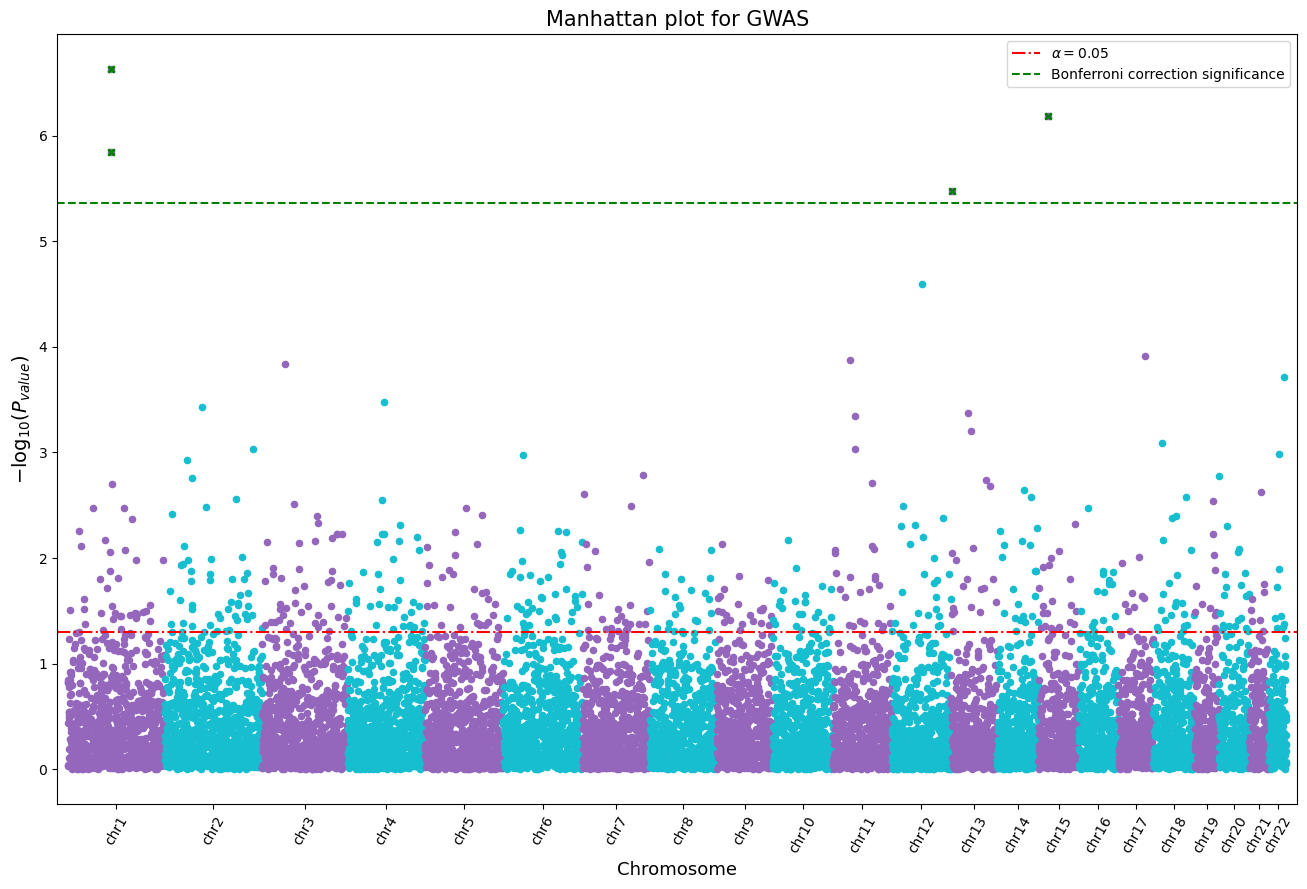

In [78]:
df_grouped = regression_df.groupby('chrom')


fig = plt.figure(figsize=(16, 10)) # Set the figure size
ax = fig.add_subplot(111)

x_labels = []
x_labels_pos = []
cycle = ['C4', 'C9']

for num, (name, group) in enumerate(df_grouped):
    
    group.plot(kind = 'scatter', x = 'ind', y = 'pvalue_logged', ax = ax, 
               color = cycle[num%2])
    x_labels.append('chr'+str(name))
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    
#significance level
alpha = 0.05
bonferroni_alpha = alpha/len(regression_df)
bonferroni_logged = -np.log10(bonferroni_alpha)
plt.axhline(y = -np.log10(alpha), color = 'r', linestyle = "-.", label = r"$\alpha = 0.05$")
plt.axhline(y = bonferroni_logged, color = 'g', linestyle = "--", 
            label = "Bonferroni correction significance")
plt.legend(framealpha = 0.7)

#changing the color of the selected points
interesting_variants = regression_df.query(f'pvalue_logged > {bonferroni_logged}')
for i in range(len(interesting_variants)):
    interesting_variants.plot(kind = 'scatter', x = 'ind', y = 'pvalue_logged', ax = ax, 
                              color ='g', marker = 'x')

#show the plot
plt.title("Manhattan plot for GWAS", size = 15)

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation = 60)

ax.set_xlim([-100, len(regression_df) + 100])
ax.set_xlabel('Chromosome', size = 13)
ax.set_ylabel(r'$-\log_{10}(P_{value})$', size = 14)

plt.show()

In [55]:
interesting_variants

,beta,pvalue,snp,chrom,position,pvalue_logged,ind
405,0.134144,2.349378e-07,rs7527051,1,102601950,6.629047,405
406,0.124792,1.420364e-06,rs12140539,1,102639332,5.847600,406
8255,0.111183,3.314163e-06,rs9509213,13,21020105,5.479626,8255
9153,-0.129339,6.471509e-07,rs2250402,15,40322552,6.188994,9153


> We can see in the dataframe above and thanks to our manhattan plot that we have 4 interesting variants with a statistically significant coefficient of association to the phenotype. 

### 5. Repeat the GWAS and Manhattan plot (steps 3 and 4), considering the top 10 principal components as covariates.

#### Step 3 : 

In [56]:
pca10 = PCA(n_components = 10)
pca10.fit(scaled_df_for_pca)
pca_data10 = pca10.transform(scaled_df_for_pca)

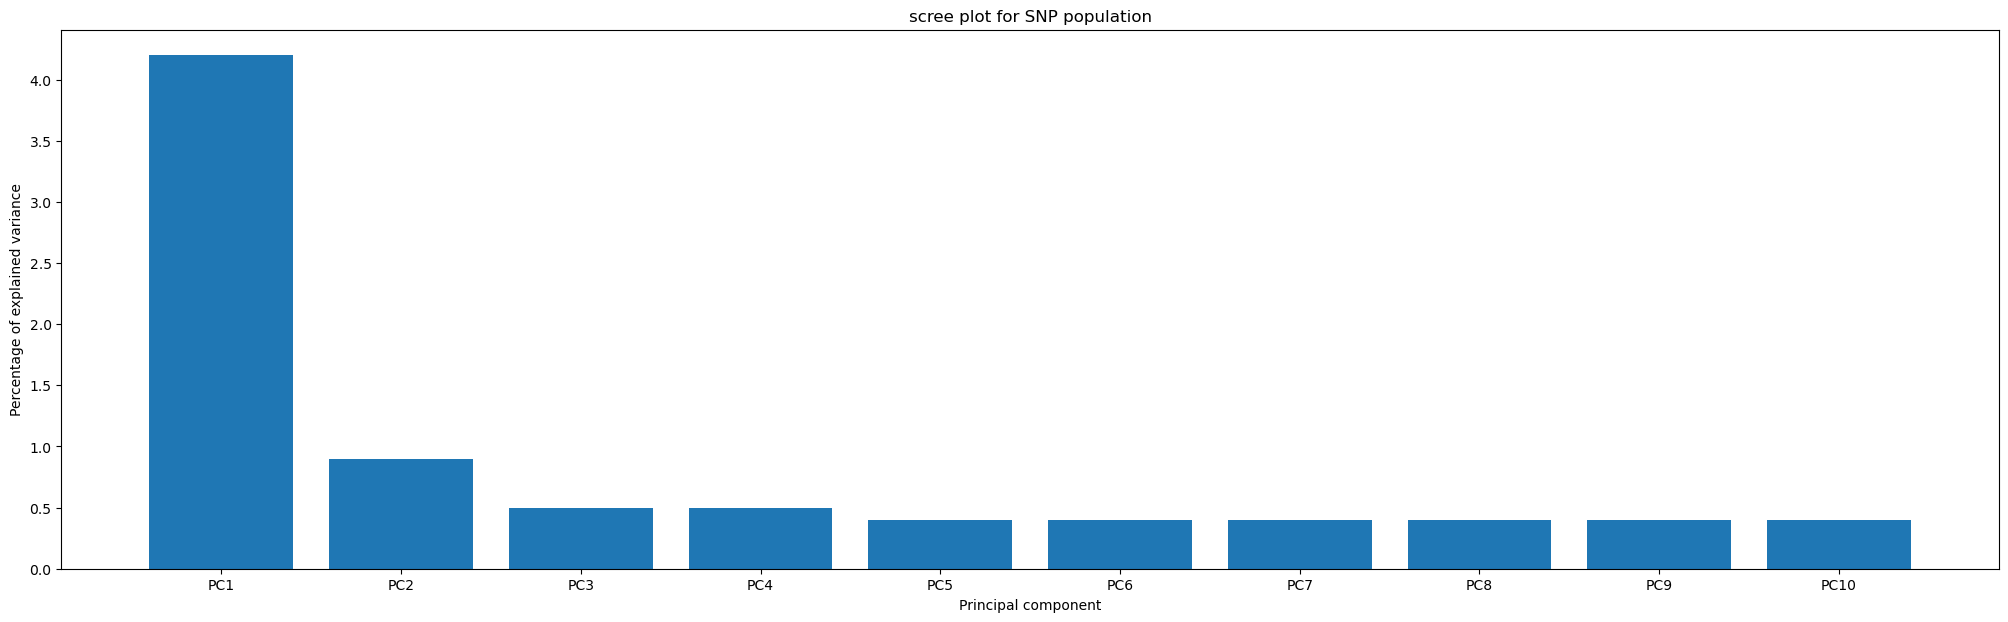

In [57]:
component_variance10 = np.round(pca10.explained_variance_ratio_ * 100, decimals = 1)
plotlabels10 = ["PC" + str(j) for j in range(1, len(component_variance10) + 1)] #10 first components

plt.figure(figsize = (25, 7))
plt.bar(x = range(1, len(component_variance10) + 1), height = component_variance10, 
        tick_label = plotlabels10)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal component")
plt.title("scree plot for SNP population")
plt.show()

In [58]:
pca_df10 = pd.DataFrame(pca_data10, columns = plotlabels10)
display(pca_df10.head(3), pca_df10.shape, df_gwas.shape)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-12.329149,14.319556,-1.185253,-1.439741,1.885980,-1.823840,1.842606,0.871108,5.879898,-2.451428
1,-15.837671,17.936536,2.301309,1.297911,5.285204,-2.342110,3.457909,-1.633885,-1.412285,5.065095
2,-14.764874,15.559457,-2.014137,0.091576,1.969273,-5.501838,-0.433577,3.086790,-0.275418,3.460046


(319, 10)

(319, 11384)

In [59]:
df_gwas_covariates = df_gwas.join(pca_df10)
df_gwas_covariates

,id,rs2748987,rs13302932,rs263531,rs78510883,rs4648423,rs12756705,rs12021796,rs598564,rs349411,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,M11051101,1,1,2,2,2,2,1,1,0,...,-12.329149,14.319556,-1.185253,-1.439741,1.885980,-1.823840,1.842606,0.871108,5.879898,-2.451428
1,M11050404,2,2,1,2,0,2,2,0,0,...,-15.837671,17.936536,2.301309,1.297911,5.285204,-2.342110,3.457909,-1.633885,-1.412285,5.065095
2,M11051105,2,2,2,2,2,1,0,2,2,...,-14.764874,15.559457,-2.014137,0.091576,1.969273,-5.501838,-0.433577,3.086790,-0.275418,3.460046
3,M11051901,2,0,1,2,0,1,2,2,1,...,-12.870439,16.972278,-0.335725,0.032293,0.825863,-0.171284,-6.185939,3.125145,2.165524,7.984311
4,M11052507,2,1,2,2,1,2,2,2,2,...,-11.601611,13.810761,1.008028,1.590168,1.216117,1.570047,-1.564384,2.191814,2.523468,1.631723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,M11072309,2,2,2,2,1,1,1,2,2,...,-18.334458,-11.675622,2.626968,1.591859,0.717242,-0.652111,3.093875,-1.315261,-0.699749,0.657637
315,M11081711,1,2,1,2,1,2,2,2,2,...,-17.565530,-9.684737,-4.396708,5.699221,-0.022402,0.282382,-2.421880,3.884347,-1.555563,0.405627
316,M11060203,1,1,2,2,2,2,1,2,2,...,-18.828089,-7.266387,0.494141,-1.573610,-0.999211,-3.735268,0.350534,2.272473,-2.740582,-3.605231
317,M11071302,1,1,2,2,1,2,2,2,1,...,-16.111190,-7.953469,0.831225,0.808738,2.651891,0.410204,-2.864567,-3.115469,4.850258,-6.455595


In [60]:
covariates = ""
for i in range(10):
    covariates += f"+ PC{i + 1} "
covariates

'+ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 '

In [61]:
second_lin_regression_data = []
for idx, column in enumerate(df_gwas.iloc[:, 1:-1].columns.values.tolist()):
    mod = smf.ols(formula = f'Cholesterol ~ {column}' + covariates, data = df_gwas_covariates)
    res = mod.fit()
    beta = res.params.iloc[1]
    pvalue = res.pvalues.iloc[1]
    second_lin_regression_data.append([beta, pvalue])

In [63]:
cov_regression_df = pd.DataFrame(second_lin_regression_data, columns = ["beta", "pvalue"])
cov_regression_df["snp"] = df_gwas.iloc[:, 1:-1].columns.values.tolist()

cov_regression_df["chrom"] = df["#CHROM"]
cov_regression_df["position"] = df["POS"]
cov_regression_df['pvalue_logged'] = - np.log10(cov_regression_df['pvalue'])
cov_regression_df['ind'] = range(len(cov_regression_df))

cov_regression_df

,beta,pvalue,snp,chrom,position,pvalue_logged,ind
0,0.003272,0.915532,rs2748987,1,1846582,0.038326,0
1,0.029988,0.242635,rs13302932,1,1963175,0.615047,1
2,0.032671,0.246825,rs263531,1,2164935,0.607611,2
3,0.078160,0.429476,rs78510883,1,2570897,0.367061,3
4,0.034750,0.149503,rs4648423,1,3765678,0.825350,4
...,...,...,...,...,...,...,...
11377,0.007178,0.760297,rs6009870,22,50154682,0.119017,11377
11378,-0.021369,0.531399,rs5771359,22,50511746,0.274580,11378
11379,0.030679,0.421820,rs2272853,22,50655822,0.374873,11379
11380,-0.059160,0.466204,rs73439320,22,50756452,0.331424,11380


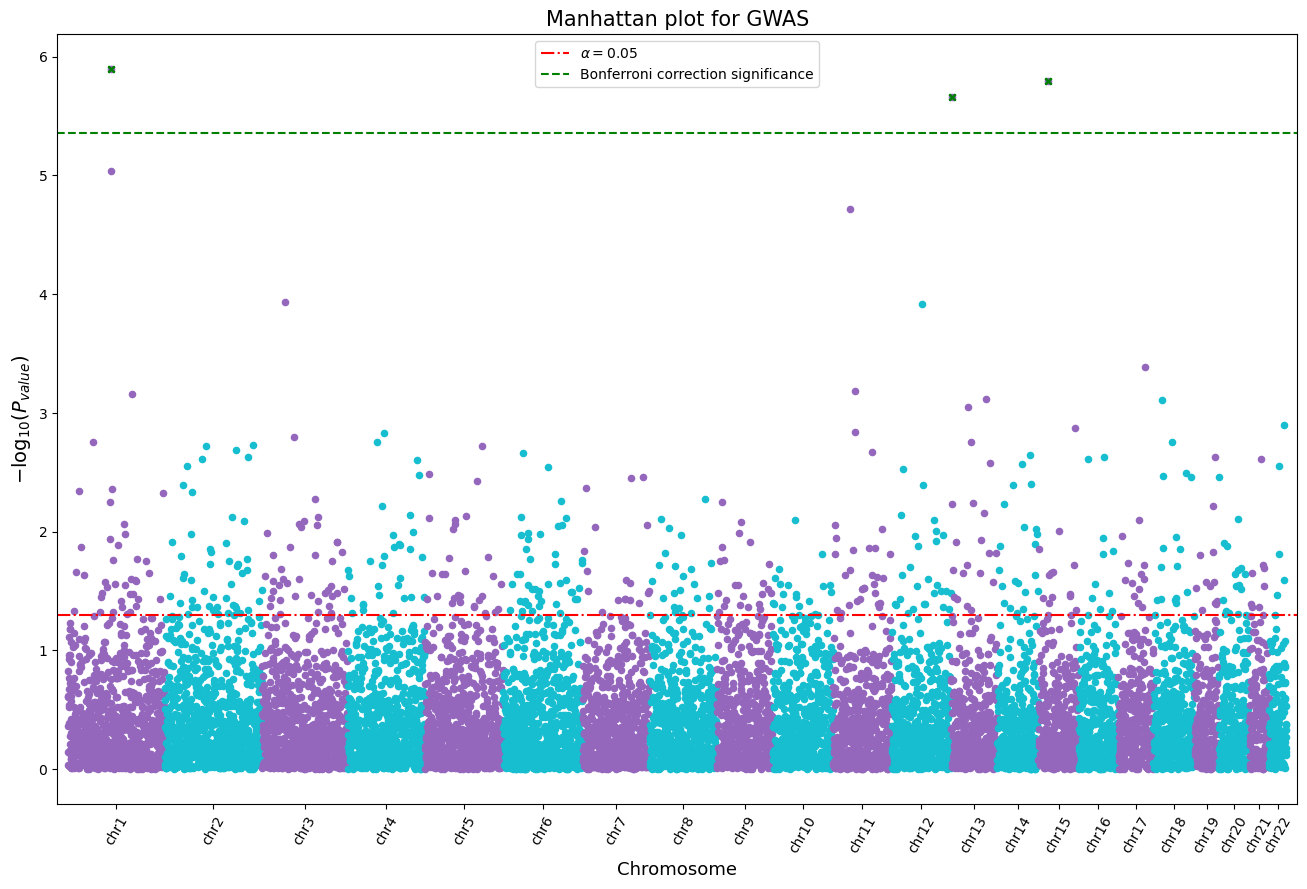

In [79]:
df_grouped = cov_regression_df.groupby('chrom')

fig = plt.figure(figsize=(16, 10)) # Set the figure size
ax = fig.add_subplot(111)

x_labels = []
x_labels_pos = []
cycle = ['C4', 'C9']

for num, (name, group) in enumerate(df_grouped):
    
    group.plot(kind = 'scatter', x = 'ind', y = 'pvalue_logged', ax = ax, 
               color = cycle[num%2])
    x_labels.append('chr'+str(name))
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

#significance level
alpha = 0.05
bonferroni_alpha = alpha/len(cov_regression_df)
bonferroni_logged = -np.log10(bonferroni_alpha)
plt.axhline(y = -np.log10(alpha), color = 'r', linestyle = "-.", label = r"$\alpha = 0.05$")
plt.axhline(y = bonferroni_logged, color = 'g', linestyle = "--", 
            label = "Bonferroni correction significance")
plt.legend(framealpha = 0.7)

#changing the color of the selected points
interesting_variants_cov = cov_regression_df.query(f'pvalue_logged > {bonferroni_logged}')
for i in range(len(interesting_variants_cov)):
    interesting_variants_cov.plot(kind = 'scatter', x = 'ind', y = 'pvalue_logged', ax = ax, 
                              color ='g', marker = 'x')
#show the plot
plt.title("Manhattan plot for GWAS", size = 15)
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation = 60)

ax.set_xlim([-100, len(regression_df) + 100])
ax.set_xlabel('Chromosome', size = 13)
ax.set_ylabel(r'$-\log_{10}(P_{value})$', size = 14)
plt.show()

In [74]:
display(interesting_variants_cov)

,beta,pvalue,snp,chrom,position,pvalue_logged,ind
405,0.132782,0.000001,rs7527051,1,102601950,5.894192,405
8255,0.115014,0.000002,rs9509213,13,21020105,5.657785,8255
9153,-0.131679,0.000002,rs2250402,15,40322552,5.791312,9153


> We can see in the dataframe above and thanks to our manhattan plot that now that we have taken into account our 10 PCs are covariates, we are left with 3 variants with a statistically significant coefficient of association to the phenotype.

### 6. QQ plot

In [75]:
expected = np.sort(-np.log10(np.random.uniform(0, 1, len(cov_regression_df))))

qq_df = pd.DataFrame({'gwas_pvalues' : np.sort(cov_regression_df['pvalue_logged'].tolist()),
                      'expected_pvalues' : expected})
qq_df

,gwas_pvalues,expected_pvalues
0,0.000002,0.000020
1,0.000035,0.000103
2,0.000038,0.000134
3,0.000075,0.000192
4,0.000115,0.000249
...,...,...
11377,4.720415,3.298377
11378,5.034369,3.638922
11379,5.657785,3.722339
11380,5.791312,3.878715


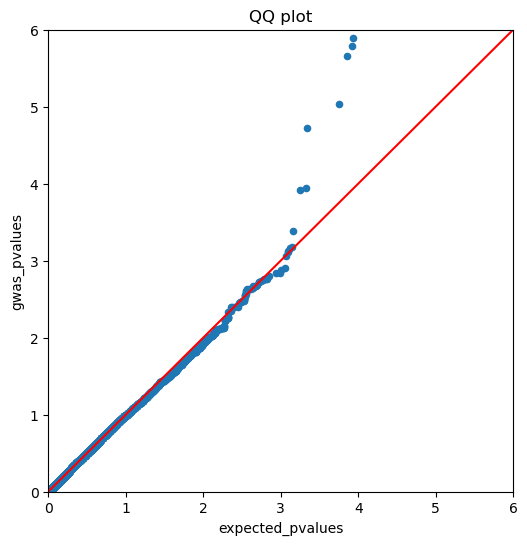

In [71]:
fig = plt.figure(figsize=(6, 6)) # Set the figure size
ax = fig.add_subplot(111)
qq_df.plot(kind = 'scatter', x = 'expected_pvalues', y = 'gwas_pvalues', ax = ax)
x = np.linspace(0, 6, 5000)
plt.plot(x, x, color = 'r')
plt.title('QQ plot')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()

>We can see that most of our GWAS p-values follow the y = x line on our QQ plot, until the very end, corresponding to the right tail of the distribution where our GWAS p values tend to be more significant than our expected ones. 


>This is quite normal and means that we have greater than expected association between our genetic variance and our phenotype. The fact that the expected p values and GWAS p values are the similarly distributed before the right tail of the distributions confirms the reliability of our results as to some extent our GWAS p values come from a uniform distribution. 

Therefore we can conclude that our GWAS results are reliable.